### Import libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

#### Data Description

In [6]:
data = pd.read_csv('dataset.csv')
data.head().style.background_gradient(cmap='Blues')

,treatment company,azimuth,md (ft),tvd (ft),date on production,operator,footage lateral length,well spacing,porpoise deviation,porpoise count,shale footage,acoustic impedance,log permeability,porosity,poisson ratio,water saturation,toc,vcl,p-velocity,s-velocity,youngs modulus,isip,breakdown pressure,pump rate,total number of stages,proppant volume,proppant fluid ratio,production
0,treatment company 1,-32.279999,19148,6443.000000,3/1/2018,operator 1,11966.000000,4368.462900,6.330000,12,1093,30123.200000,0.680000,0.020000,0.340000,0.850000,5.000000,0.420000,13592.230000,6950.440000,30.820000,4149.000000,nan,83,56,21568792.000000,1.230000,5614.947951
1,treatment company 2,-19.799999,15150,7602.000000,7/1/2014,operator 2,6890.000000,4714.992200,1.280000,4,0,30951.610000,1.850000,0.170000,0.190000,0.690000,4.220000,0.740000,11735.040000,7162.450000,29.720000,5776.000000,nan,102,33,9841307.000000,1.470000,2188.836707
2,treatment company 3,-26.879999,14950,5907.000000,8/1/2018,operator 1,8793.000000,798.920960,2.030000,6,3254,28900.250000,0.290000,0.020000,0.330000,nan,4.690000,0.610000,13227.810000,6976.930000,30.990000,4628.000000,nan,88,62,17116240.000000,1.670000,1450.033022
3,treatment company 4,-49.099998,11098,6538.000000,1/1/2012,operator 1,4234.000000,nan,6.000000,23,7470,32826.080000,0.730000,0.030000,0.200000,nan,4.400000,0.560000,12646.340000,6799.370000,26.200000,4582.000000,nan,100,11,3749559.000000,0.770000,1060.764407
4,treatment company 5,5.560000,10549,7024.000000,1/1/2012,operator 3,2972.000000,2967.563000,11.870000,9,3637,26740.050000,0.470000,0.020000,0.330000,0.800000,4.660000,0.580000,13192.180000,7046.910000,31.180000,4909.000000,nan,94,9,6690705.000000,1.320000,607.530385


In [4]:
# check the shape of the data
data.shape

(1000, 28)

- the data has 1000 rows and 28 columns

In [5]:
# check data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   treatment company       1000 non-null   object 
 1   azimuth                 945 non-null    float64
 2   md (ft)                 1000 non-null   int64  
 3   tvd (ft)                980 non-null    float64
 4   date on production      1000 non-null   object 
 5   operator                1000 non-null   object 
 6   footage lateral length  1000 non-null   float64
 7   well spacing            844 non-null    float64
 8   porpoise deviation      1000 non-null   float64
 9   porpoise count          1000 non-null   int64  
 10  shale footage           1000 non-null   int64  
 11  acoustic impedance      1000 non-null   float64
 12  log permeability        1000 non-null   float64
 13  porosity                881 non-null    float64
 14  poisson ratio           1000 non-null   f

- Number of Dtypes:
- Float64 =20
- int64 = 5
- object = 3

In [6]:
data.columns

Index(['treatment company', 'azimuth', 'md (ft)', 'tvd (ft)',
       'date on production', 'operator', 'footage lateral length',
       'well spacing', 'porpoise deviation', 'porpoise count', 'shale footage',
       'acoustic impedance', 'log permeability', 'porosity', 'poisson ratio',
       'water saturation', 'toc', 'vcl', 'p-velocity', 's-velocity',
       'youngs modulus', 'isip', 'breakdown pressure', 'pump rate',
       'total number of stages', 'proppant volume', 'proppant fluid ratio',
       'production'],
      dtype='object')

In [7]:
data['date on production'] = pd.to_datetime(data['date on production'])

In [9]:
# check data types
data.dtypes

treatment company                 object
azimuth                          float64
md (ft)                            int64
tvd (ft)                         float64
date on production        datetime64[ns]
operator                          object
footage lateral length           float64
well spacing                     float64
porpoise deviation               float64
porpoise count                     int64
shale footage                      int64
acoustic impedance               float64
log permeability                 float64
porosity                         float64
poisson ratio                    float64
water saturation                 float64
toc                              float64
vcl                              float64
p-velocity                       float64
s-velocity                       float64
youngs modulus                   float64
isip                             float64
breakdown pressure               float64
pump rate                          int64
total number of 

In [10]:
# check missing values
data.isna().sum()

treatment company           0
azimuth                    55
md (ft)                     0
tvd (ft)                   20
date on production          0
operator                    0
footage lateral length      0
well spacing              156
porpoise deviation          0
porpoise count              0
shale footage               0
acoustic impedance          0
log permeability            0
porosity                  119
poisson ratio               0
water saturation          577
toc                        21
vcl                         0
p-velocity                  0
s-velocity                  0
youngs modulus             19
isip                       77
breakdown pressure        744
pump rate                   0
total number of stages      0
proppant volume           132
proppant fluid ratio        0
production                  0
dtype: int64

- There are a lot of missing values in most of the columns in the dataset

In [12]:
# check percentage of missing values in each columns
(data.isna().sum()/len(data))*100

treatment company          0.0
azimuth                    5.5
md (ft)                    0.0
tvd (ft)                   2.0
date on production         0.0
operator                   0.0
footage lateral length     0.0
well spacing              15.6
porpoise deviation         0.0
porpoise count             0.0
shale footage              0.0
acoustic impedance         0.0
log permeability           0.0
porosity                  11.9
poisson ratio              0.0
water saturation          57.7
toc                        2.1
vcl                        0.0
p-velocity                 0.0
s-velocity                 0.0
youngs modulus             1.9
isip                       7.7
breakdown pressure        74.4
pump rate                  0.0
total number of stages     0.0
proppant volume           13.2
proppant fluid ratio       0.0
production                 0.0
dtype: float64

- water saturation,breakdown pressure are the columns that contain missing values more than 50 %

### Descriptive Statistics

In [13]:
numerical_attributes = data.select_dtypes(include=['int64', 'float64'])
categorical_attributes = data.select_dtypes(exclude=['int64','float64'])

In [18]:
data.describe().style.background_gradient(cmap='plasma')

,azimuth,md (ft),tvd (ft),date on production,footage lateral length,well spacing,porpoise deviation,porpoise count,shale footage,acoustic impedance,log permeability,porosity,poisson ratio,water saturation,toc,vcl,p-velocity,s-velocity,youngs modulus,isip,breakdown pressure,pump rate,total number of stages,proppant volume,proppant fluid ratio,production
count,945.000000,1000.000000,980.000000,1000,1000.000000,844.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,881.000000,1000.000000,423.000000,979.000000,1000.000000,1000.000000,1000.000000,981.000000,923.000000,256.000000,1000.000000,1000.000000,868.000000,1000.000000,1000.000000
mean,-33.905735,13988.387000,7103.620408,2015-05-18 23:39:50.400000256,6387.049510,2223.227174,50.457090,9.443000,3784.827000,33492.835400,0.623570,0.032338,0.304310,0.788913,4.618652,0.629230,12766.714230,6933.582230,30.275525,4965.485374,7365.949219,85.052000,28.815000,10608800.755760,1.166130,1949.919511
min,-87.250000,8642.000000,4859.000000,2011-01-01 00:00:00,1329.000000,335.458620,0.030000,0.000000,0.000000,26740.050000,-0.030000,0.000000,0.190000,0.220000,1.630000,0.030000,10631.340000,6374.620000,25.640000,2149.000000,4364.000000,2.000000,9.000000,176096.000000,0.030000,76.107246
25%,-46.220001,12157.500000,6407.000000,2013-07-01 00:00:00,4668.000000,1084.525475,4.660000,4.000000,0.000000,32718.460000,0.310000,0.020000,0.280000,0.735000,4.515000,0.470000,12230.625000,6808.660000,29.720000,4391.500000,6102.750000,77.000000,16.000000,6146848.500000,0.950000,1003.897453
50%,-32.990002,13659.500000,6977.000000,2015-04-01 00:00:00,5927.000000,1999.295250,10.880000,8.000000,3591.500000,34592.225000,0.520000,0.020000,0.330000,0.830000,4.680000,0.580000,13158.920000,6958.975000,30.840000,4927.000000,7018.000000,86.000000,26.000000,9082286.000000,1.120000,1568.681918
75%,-22.580000,15468.000000,7820.000000,2017-08-01 00:00:00,7744.000000,3090.201450,30.537500,13.000000,6081.750000,34819.790000,0.870000,0.040000,0.340000,0.870000,4.825000,0.630000,13272.570000,7037.292500,31.130000,5550.500000,8868.250000,95.000000,39.000000,13661052.750000,1.330000,2621.207163
max,22.940001,27797.000000,9639.000000,2019-04-01 00:00:00,19849.000000,5225.089400,1106.130000,39.000000,17763.000000,38057.630000,1.940000,0.210000,0.350000,1.040000,6.860000,2.050000,14501.580000,7491.530000,33.100000,9295.000000,11116.000000,110.000000,110.000000,41950368.000000,5.410000,8880.671151
std,17.975658,2584.315924,896.947293,nan,2520.330314,1255.063341,118.436695,6.882596,3703.775191,2074.387344,0.392759,0.025756,0.044977,0.142612,0.583358,0.313222,713.112641,179.966553,1.488059,778.399766,1484.094160,12.510308,15.518234,6404057.620211,0.375550,1351.485865


### Categorical Attributes

In [23]:
# check categorical attributes count()
categorical_attributes.apply(lambda x: x.unique().shape[0])

treatment company     31
date on production    87
operator              36
dtype: int64

- Treatment company has 31 unique values
- Operator has 36 unique values

In [20]:
data[['treatment company']].value_counts()

treatment company   
treatment company 1     130
treatment company 10    120
treatment company 12    116
treatment company 4     113
treatment company 5      85
treatment company 8      77
treatment company 9      76
treatment company 2      71
treatment company 3      70
treatment company 11     30
treatment company 7      29
treatment company 16     23
treatment company 6       9
treatment company 13      9
treatment company 15      7
treatment company 23      5
treatment company 17      4
treatment company 24      3
treatment company 29      3
treatment company 14      3
treatment company 19      3
treatment company 25      2
treatment company 26      2
treatment company 30      2
treatment company 31      2
treatment company 28      1
treatment company 22      1
treatment company 21      1
treatment company 20      1
treatment company 18      1
treatment company 27      1
Name: count, dtype: int64

- The above list is count of treatment company

In [24]:
data[['operator']].value_counts()

operator   
operator 4     133
operator 11    130
operator 1     106
operator 5      83
operator 6      73
operator 14     63
operator 8      53
operator 7      46
operator 25     46
operator 20     45
operator 2      40
operator 26     28
operator 9      23
operator 22     18
operator 17     16
operator 19     15
operator 13     13
operator 18     12
operator 15     10
operator 27      7
operator 12      6
operator 16      6
operator 24      4
operator 29      4
operator 3       3
operator 23      3
operator 35      2
operator 33      2
operator 30      2
operator 28      2
operator 34      1
operator 36      1
operator 32      1
operator 21      1
operator 10      1
operator 31      1
Name: count, dtype: int64

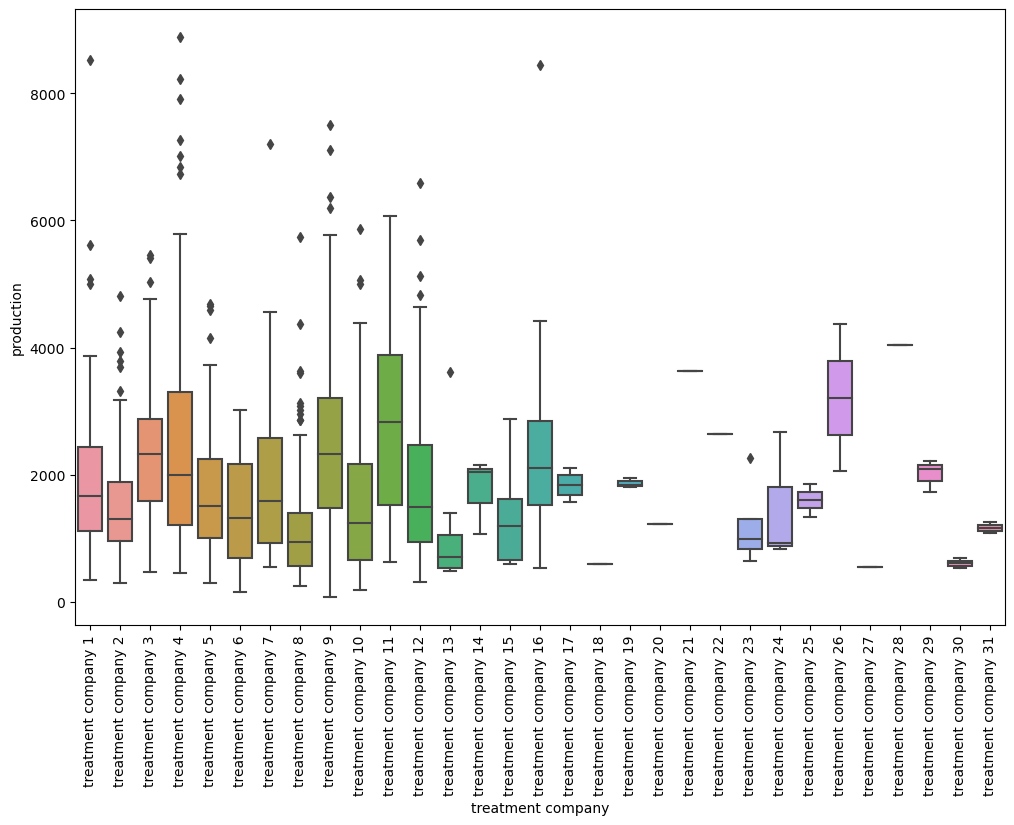

In [26]:
# check outliers of production by treatment company
plt.figure(figsize=(12,8))
ax = sns.boxplot(x='treatment company', y ='production',data= data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

- There are a lot of outliers in the production column

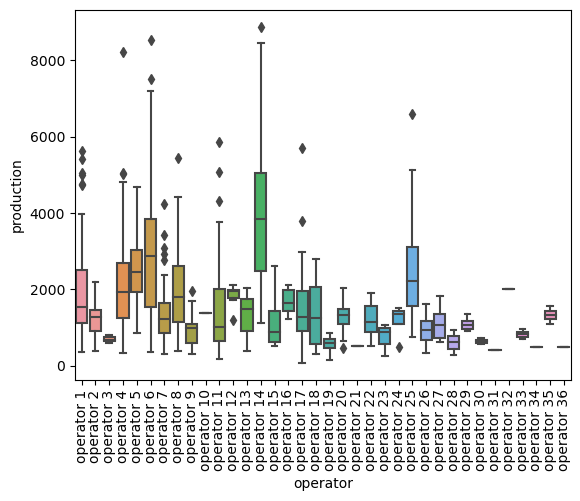

In [27]:
ay =sns.boxplot(x='operator',y='production', data=data)
ay.set_xticklabels(ay.get_xticklabels(),rotation=90)
plt.show()

### Feature Engineering

In [28]:
df1 = data.copy()

In [29]:
df1['month_on_production'] = df1['date on production'].dt.month
df1['yeat_on_production'] = df1['date on production'].dt.year


In [30]:
df1.head()

,treatment company,azimuth,md (ft),tvd (ft),date on production,operator,footage lateral length,well spacing,porpoise deviation,porpoise count,...,youngs modulus,isip,breakdown pressure,pump rate,total number of stages,proppant volume,proppant fluid ratio,production,month_on_production,yeat_on_production
0,treatment company 1,-32.279999,19148,6443.0,2018-03-01,operator 1,11966.0,4368.46290,6.33,12,...,30.82,4149.0,NaN,83,56,21568792.0,1.23,5614.947951,3,2018
1,treatment company 2,-19.799999,15150,7602.0,2014-07-01,operator 2,6890.0,4714.99220,1.28,4,...,29.72,5776.0,NaN,102,33,9841307.0,1.47,2188.836707,7,2014
2,treatment company 3,-26.879999,14950,5907.0,2018-08-01,operator 1,8793.0,798.92096,2.03,6,...,30.99,4628.0,NaN,88,62,17116240.0,1.67,1450.033022,8,2018
3,treatment company 4,-49.099998,11098,6538.0,2012-01-01,operator 1,4234.0,NaN,6.00,23,...,26.20,4582.0,NaN,100,11,3749559.0,0.77,1060.764407,1,2012
4,treatment company 5,5.560000,10549,7024.0,2012-01-01,operator 3,2972.0,2967.56300,11.87,9,...,31.18,4909.0,NaN,94,9,6690705.0,1.32,607.530385,1,2012


In [31]:
df2 = df1.copy()

In [32]:
numerical_attributes = df2.select_dtypes(include=['int64','float64'])
categorical_attributes = df2.select_dtypes(exclude=['int64','float64','datetime64[ns]'])

## Univariate Analysis 

#### Response Variable

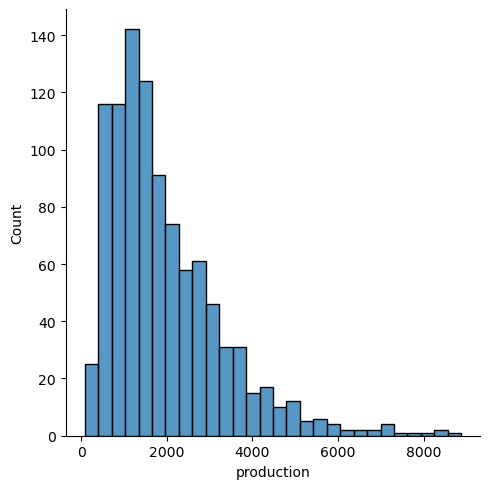

In [33]:
sns.displot(data['production'])

- The distribution of our target, Production column is skewed to the right


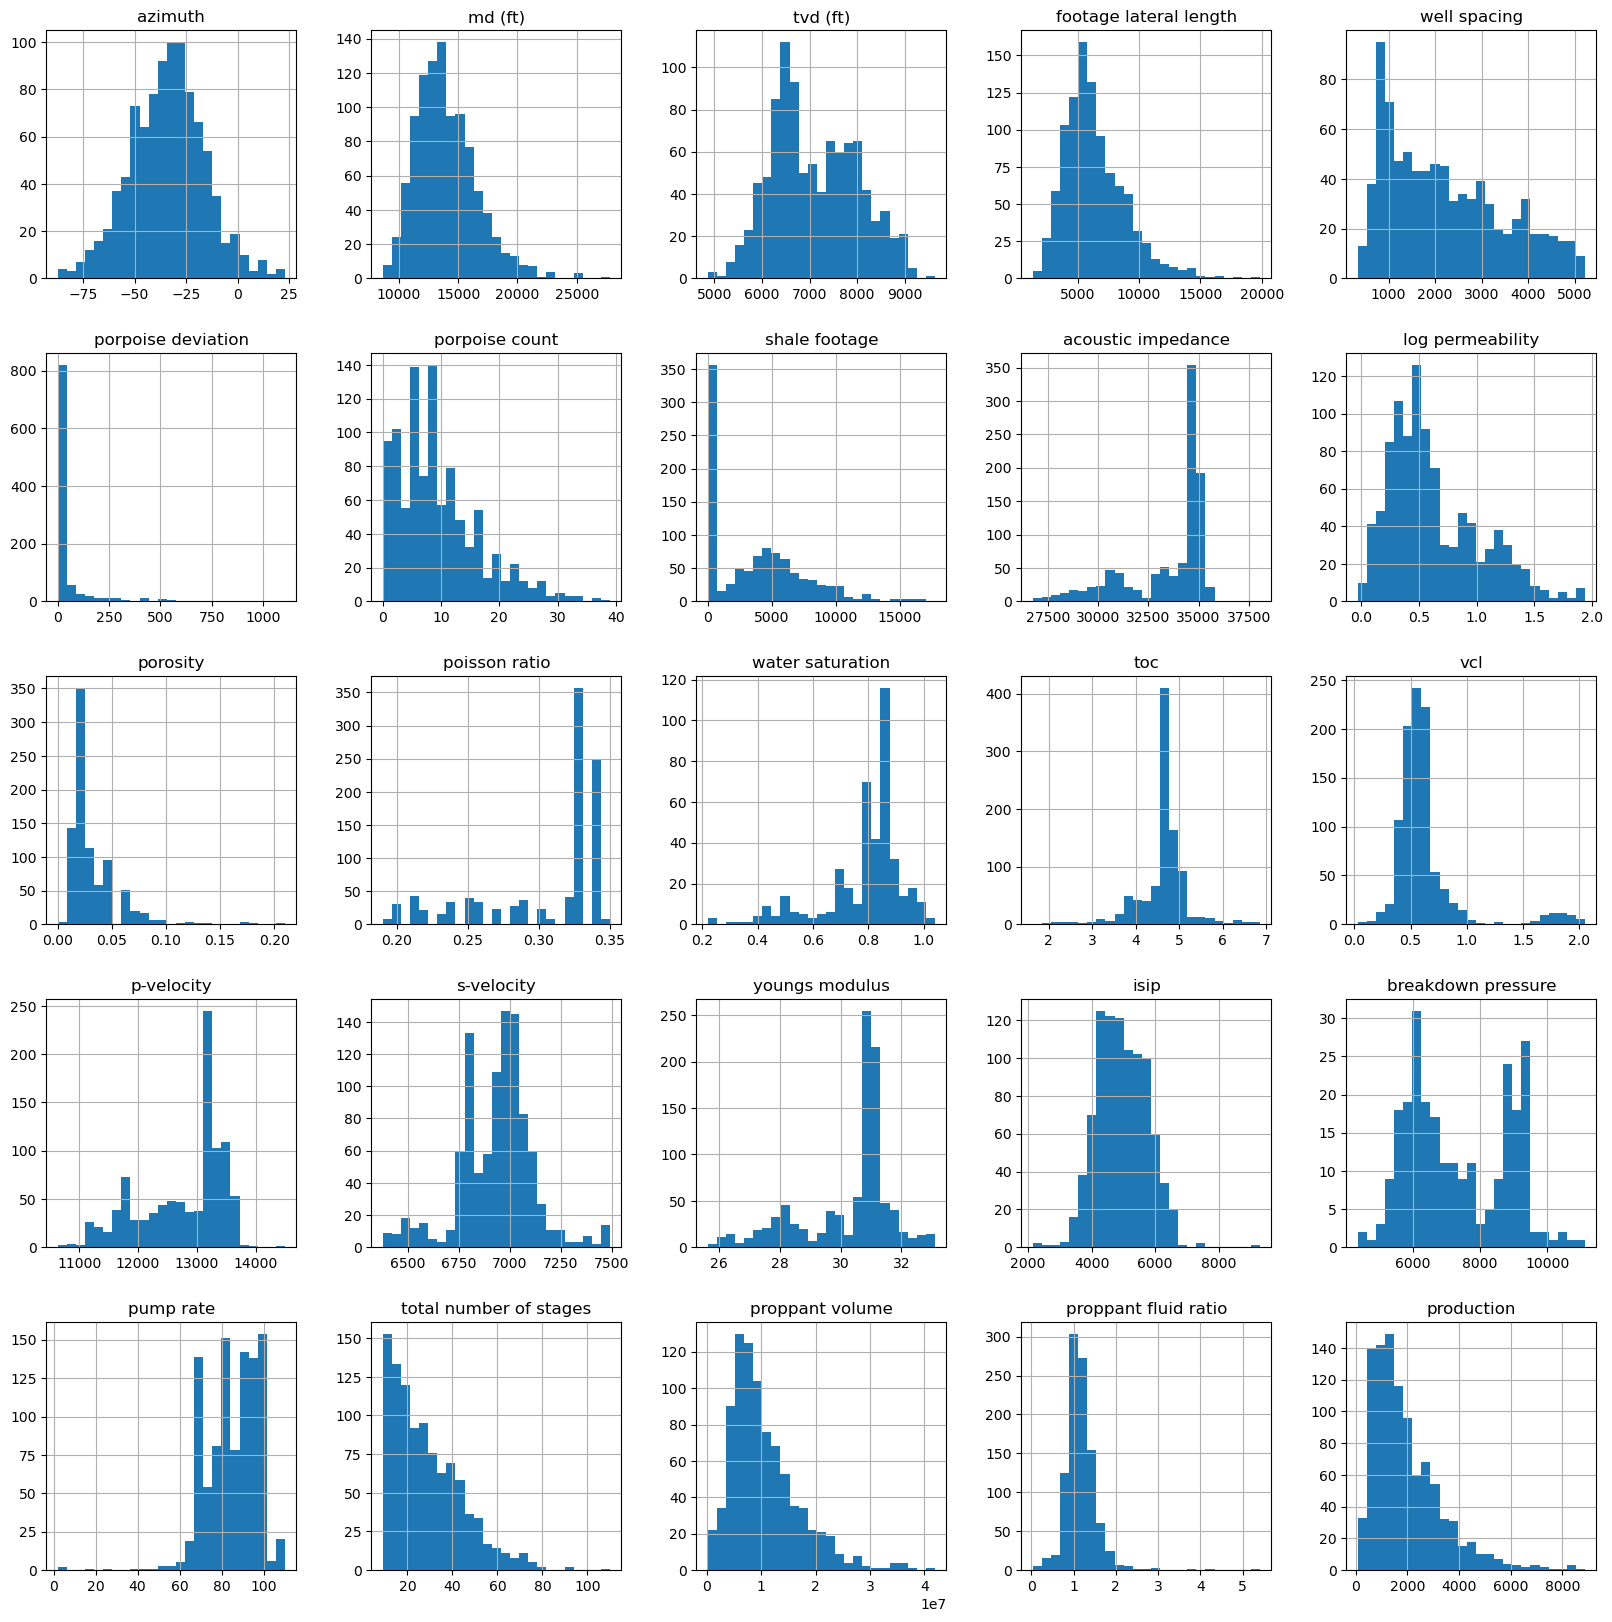

In [40]:
plt.style.use('default')
numerical_attributes.hist(bins=25, figsize=[20,20])
plt.show()

- The above plottings are the distribution of each column
- The above graph shows that almost all the data in each column is skewed either to the right or to the left, no normal distribution

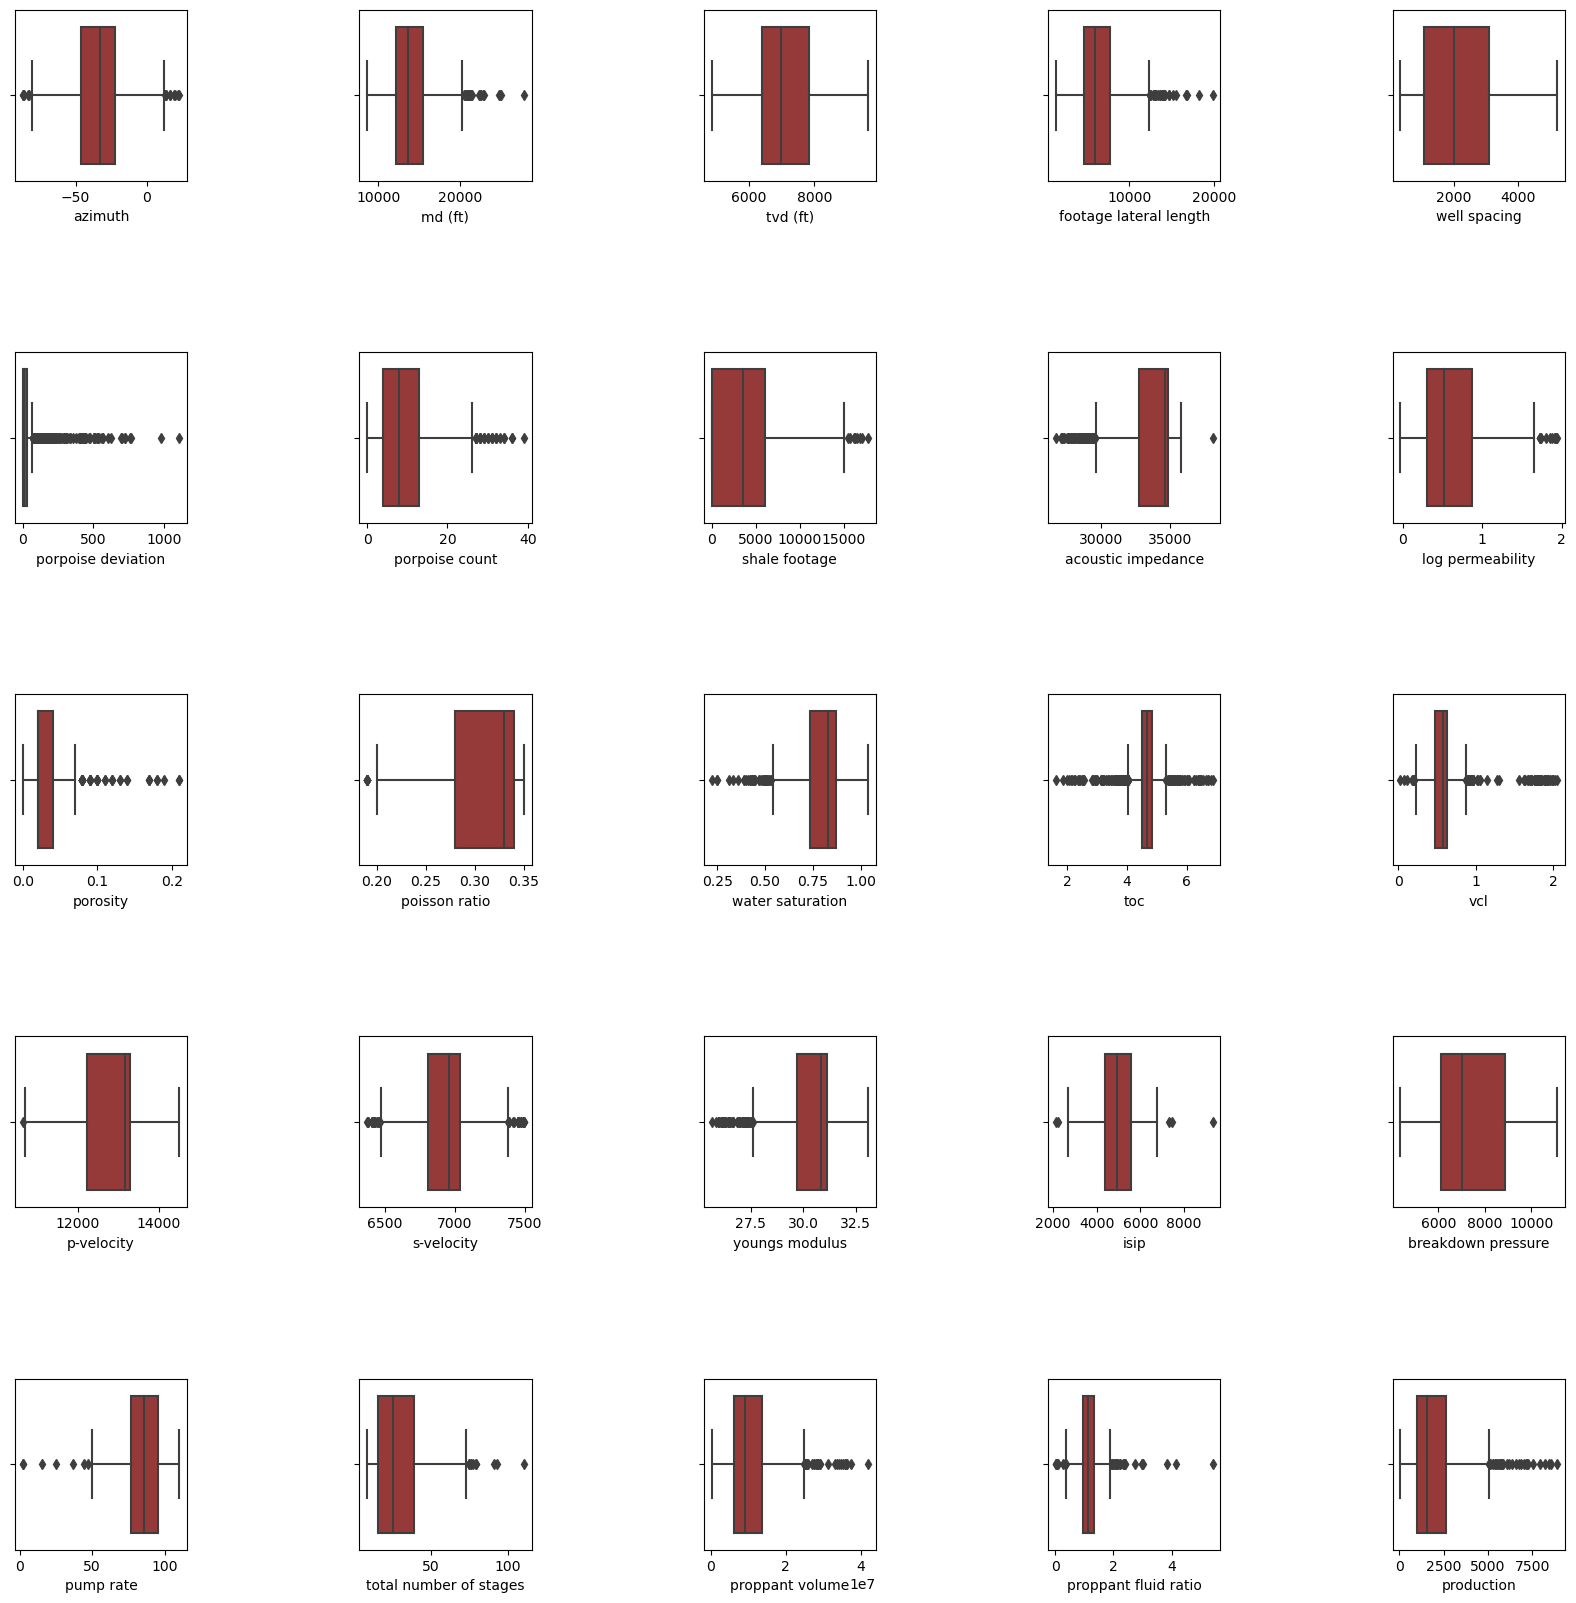

In [38]:
plt.style.use('default')

fig,ax = plt.subplots(5,5,figsize=[20,20])
for idx,num_col in enumerate(numerical_attributes):
    row, col= idx//5,idx%5
    sns.boxplot(x=num_col, data=df2, ax=ax[row,col],color='brown')
    
plt.subplots_adjust(hspace=1,wspace=1)
plt.show()

- There are alot of outliers in the data as seen in the above boxplots

In [43]:
# check production is correlated to the numerical attributes
df_corr = pd.DataFrame(numerical_attributes.corr()['production'].sort_values(ascending=False))[1:]
df_corr

,production
proppant volume,0.573235
md (ft),0.511440
total number of stages,0.493335
footage lateral length,0.460939
tvd (ft),0.184488
isip,0.149451
pump rate,0.143837
azimuth,0.130269
proppant fluid ratio,0.129260
water saturation,0.049954


- [porpoise count,acoustic impedance,porpoise deviation,poisson ratio, toc, s-velocity,youngs modulus,p-velocity]
- the above columns correlate negatively with the target, production

Text(0.5, 1.0, 'Production Correlations')

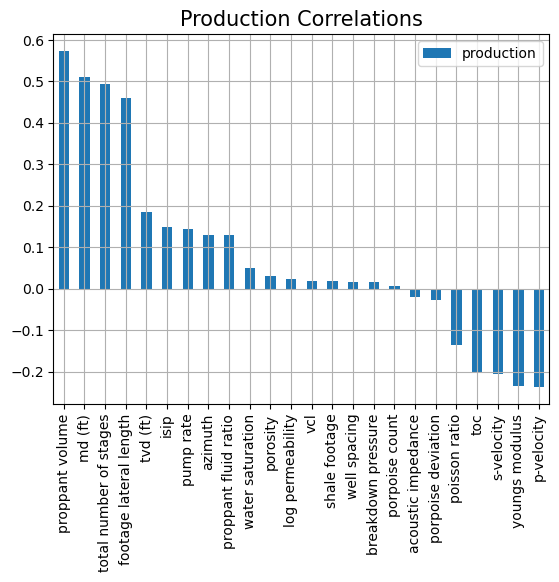

In [44]:
df_corr.plot(kind='bar', grid=True)
plt.title('Production Correlations', size=15)

## Hypothesis and Insights

#### H1. Wells with a greater number of stages produce more.

True: This relationship doesn't apply for all values of total number of stages, but it tends to be true

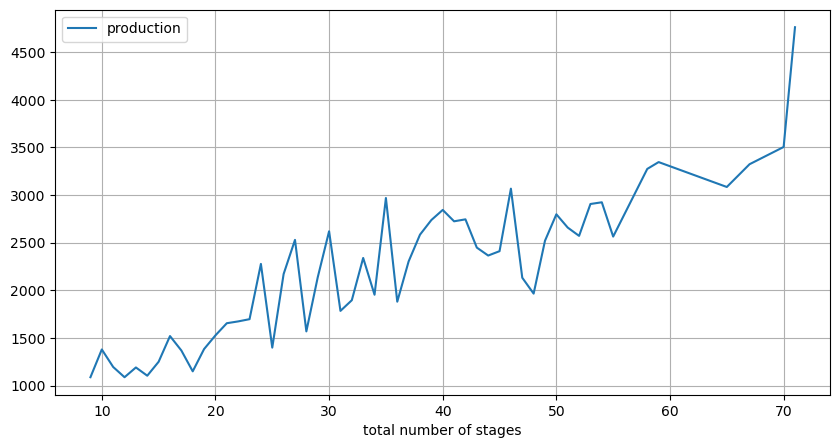

In [45]:
(df2[df2['total number of stages'].map(df2['total number of stages'].value_counts())>3][['total number of stages','production']].groupby('total number of stages').mean().plot(figsize=(10,5)))

plt.style.use('default')
plt.grid()


#### H2: Wells that started producing longer ago produce less.

True: Productions from newer wells are better.

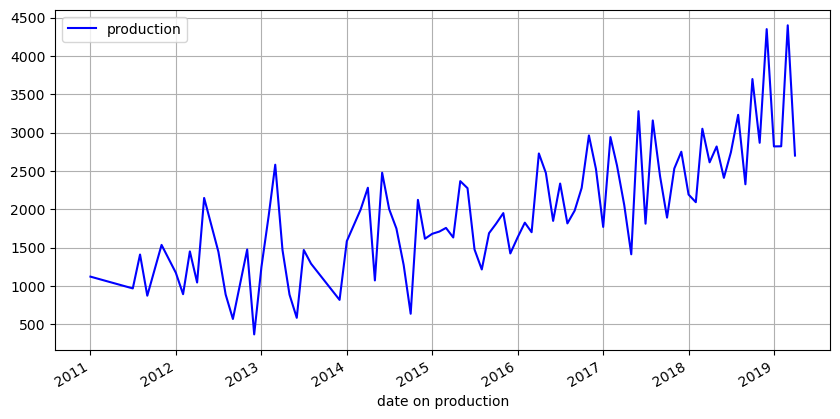

In [46]:
df2[['production','date on production']].groupby('date on production').mean().plot(figsize=(10,5), color = 'blue')
plt.grid()

#### H3: Wells that are farther from the others produce more.

False: The production doesn't increase according to the distance from other wells

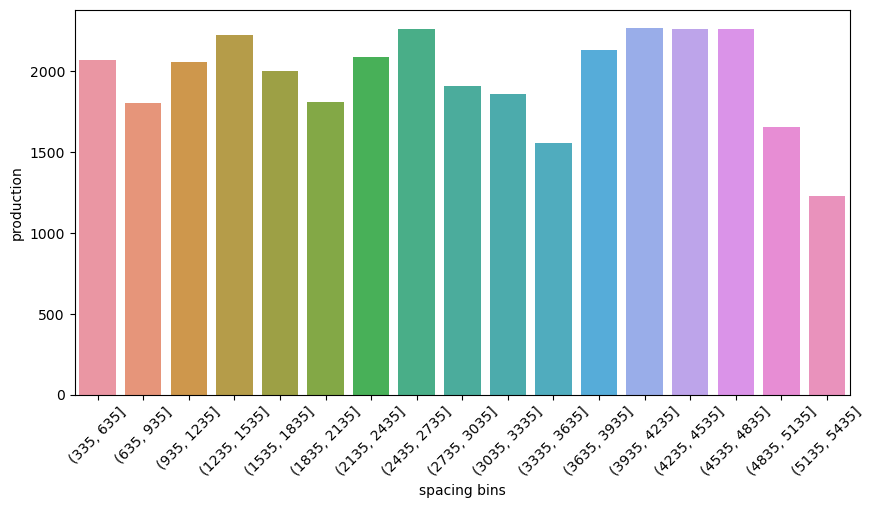

In [47]:
plt.figure(figsize=(10,5))
bins = np.arange(335,5500,300)
aux  = df2[['well spacing', 'production']].copy()
aux['spacing bins'] = pd.cut(df2['well spacing'], bins)
aux2 = aux[['spacing bins','production']].groupby('spacing bins').mean().reset_index()
sns.barplot(data=aux2, x='spacing bins',y='production')
plt.xticks(rotation=45)
plt.show()

#### H4: Wells in which more proppant were used produce more.

True: More proppant indicates a greater prodcuction

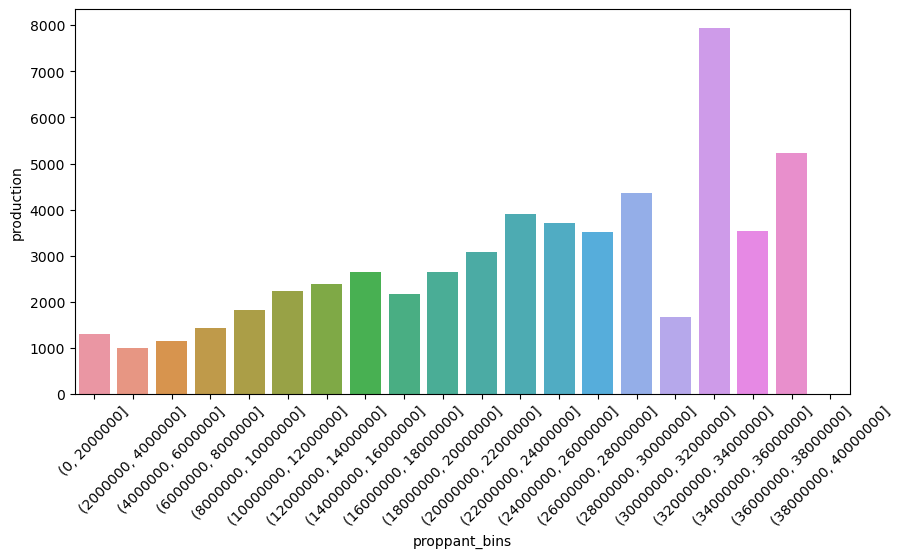

In [48]:
plt.figure(figsize=(10,5))
bins = np.arange(0, 42000000, 2000000)
aux = df2[['proppant volume', 'production']].copy()
aux['proppant_bins'] = pd.cut(df2['proppant volume'], bins)
aux2 = aux[['proppant_bins', 'production']].groupby('proppant_bins').mean().reset_index()
sns.barplot(data=aux2, x='proppant_bins',y ='production')
plt.xticks(rotation=45)
plt.show()

#### H5: Wells in which the rocks have higher value of porosity produce more.

False: More porosities does not mean more production.

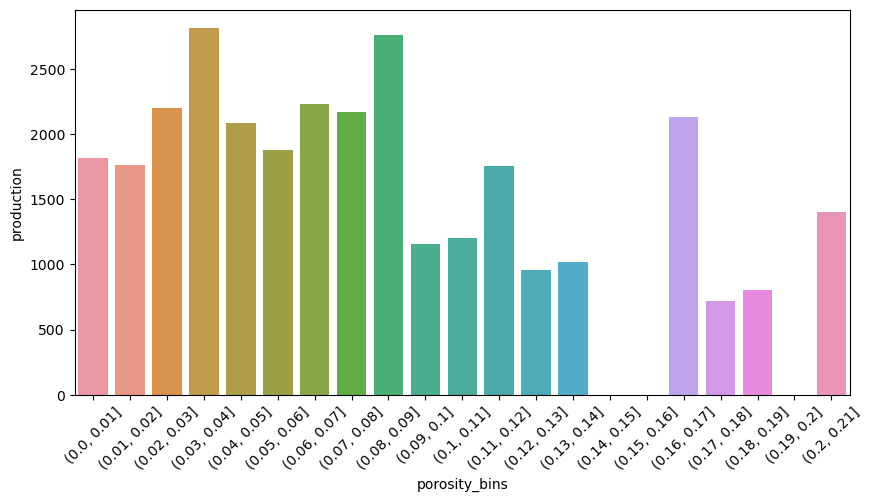

In [49]:
plt.figure(figsize=(10,5))
bins = np.arange(0,0.22,0.01)
aux = df2[['porosity','production']].copy()
aux['porosity_bins'] = pd.cut(df2['porosity'],bins)
aux2 = aux[['porosity_bins','production']].groupby('porosity_bins').mean().reset_index()
sns.barplot(data=aux2, x='porosity_bins', y= 'production')
plt.xticks(rotation=45)
plt.show()

### Data Preparation for Machine Learning

In [117]:
df3 = df2.copy()

##### Converting categorical variables to numerical

In [120]:
## Change treatment company and operator to numerical variables
df3['treatment company'] = df3['treatment company'].astype('category').cat.codes
df3['operator'] = df3['operator'].astype('category').cat.codes

In [121]:
df3.head()

,treatment company,azimuth,md (ft),tvd (ft),date on production,operator,footage lateral length,well spacing,porpoise deviation,porpoise count,...,youngs modulus,isip,breakdown pressure,pump rate,total number of stages,proppant volume,proppant fluid ratio,production,month_on_production,yeat_on_production
0,0,-32.279999,19148,6443.0,2018-03-01,0,11966.0,4368.462900,6.33,12,...,30.82,4149.0,7365.949219,83,56,21568792.0,1.23,5614.947951,3,2018
1,11,-19.799999,15150,7602.0,2014-07-01,11,6890.0,4714.992200,1.28,4,...,29.72,5776.0,7365.949219,102,33,9841307.0,1.47,2188.836707,7,2014
2,22,-26.879999,14950,5907.0,2018-08-01,0,8793.0,798.920960,2.03,6,...,30.99,4628.0,7365.949219,88,62,17116240.0,1.67,1450.033022,8,2018
3,25,-49.099998,11098,6538.0,2012-01-01,0,4234.0,2223.227174,6.00,23,...,26.20,4582.0,7365.949219,100,11,3749559.0,0.77,1060.764407,1,2012
4,26,5.560000,10549,7024.0,2012-01-01,22,2972.0,2967.563000,11.87,9,...,31.18,4909.0,7365.949219,94,9,6690705.0,1.32,607.530385,1,2012


In [123]:
## drop date on production column

df3.drop(['date on production'], axis=1, inplace=True)

In [124]:
df3.head()

,treatment company,azimuth,md (ft),tvd (ft),operator,footage lateral length,well spacing,porpoise deviation,porpoise count,shale footage,...,youngs modulus,isip,breakdown pressure,pump rate,total number of stages,proppant volume,proppant fluid ratio,production,month_on_production,yeat_on_production
0,0,-32.279999,19148,6443.0,0,11966.0,4368.462900,6.33,12,1093,...,30.82,4149.0,7365.949219,83,56,21568792.0,1.23,5614.947951,3,2018
1,11,-19.799999,15150,7602.0,11,6890.0,4714.992200,1.28,4,0,...,29.72,5776.0,7365.949219,102,33,9841307.0,1.47,2188.836707,7,2014
2,22,-26.879999,14950,5907.0,0,8793.0,798.920960,2.03,6,3254,...,30.99,4628.0,7365.949219,88,62,17116240.0,1.67,1450.033022,8,2018
3,25,-49.099998,11098,6538.0,0,4234.0,2223.227174,6.00,23,7470,...,26.20,4582.0,7365.949219,100,11,3749559.0,0.77,1060.764407,1,2012
4,26,5.560000,10549,7024.0,22,2972.0,2967.563000,11.87,9,3637,...,31.18,4909.0,7365.949219,94,9,6690705.0,1.32,607.530385,1,2012


In [125]:
df3['productions'] = df3['production']

In [127]:
df3.drop(['production'],axis=1, inplace=True)

### Set Feature and Target set of the dataset

In [128]:
## X = feature set
# Y = Target set

X = df3.iloc[:,:-1]
Y = df3.iloc[:,-1]

In [129]:
Y.head()

0    5614.947951
1    2188.836707
2    1450.033022
3    1060.764407
4     607.530385
Name: productions, dtype: float64

In [130]:
X.head()

,treatment company,azimuth,md (ft),tvd (ft),operator,footage lateral length,well spacing,porpoise deviation,porpoise count,shale footage,...,s-velocity,youngs modulus,isip,breakdown pressure,pump rate,total number of stages,proppant volume,proppant fluid ratio,month_on_production,yeat_on_production
0,0,-32.279999,19148,6443.0,0,11966.0,4368.462900,6.33,12,1093,...,6950.44,30.82,4149.0,7365.949219,83,56,21568792.0,1.23,3,2018
1,11,-19.799999,15150,7602.0,11,6890.0,4714.992200,1.28,4,0,...,7162.45,29.72,5776.0,7365.949219,102,33,9841307.0,1.47,7,2014
2,22,-26.879999,14950,5907.0,0,8793.0,798.920960,2.03,6,3254,...,6976.93,30.99,4628.0,7365.949219,88,62,17116240.0,1.67,8,2018
3,25,-49.099998,11098,6538.0,0,4234.0,2223.227174,6.00,23,7470,...,6799.37,26.20,4582.0,7365.949219,100,11,3749559.0,0.77,1,2012
4,26,5.560000,10549,7024.0,22,2972.0,2967.563000,11.87,9,3637,...,7046.91,31.18,4909.0,7365.949219,94,9,6690705.0,1.32,1,2012


In [131]:
X.shape,Y.shape

((1000, 28), (1000,))

### Split the dataset into train and test set

#### Import libraries for ML

In [132]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [133]:
x_train,x_test, y_train,y_test = train_test_split(X,Y,test_size=0.3, random_state=100)

In [135]:
x_train.shape, y_train.shape

((700, 28), (700,))

In [136]:
x_test.shape, y_test.shape

((300, 28), (300,))

#### First Model -- LinearRegression model

In [137]:
## Lets standardize the data

scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

#### Build the LinearRegression model

In [138]:
lr = LinearRegression()

# Train the model

lr.fit(x_train_scaled,y_train)


LinearRegression()

In [139]:
# Test the model
y_pred = lr.predict(x_test_scaled)


In [147]:
score = lr.score(x_test_scaled,y_test)
print(round(score*100),"%")

44 %


### Second Model -- RandomForestRegressor model

In [148]:
clf = RandomForestRegressor(n_jobs=1)

In [149]:
# Build on the RandomForest model
clf.fit(x_train, y_train)

RandomForestRegressor(n_jobs=1)

In [150]:
# Test the model
pred_target = clf.predict(x_test)

In [151]:
clf.score(x_test,y_test)

0.5540138992223935